In [2]:
!pip install minisom


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12044 sha256=2e40930ea3821b27938b0270b589630d5021e1d6c5d34b8398ff645ffa5b2912
  Stored in directory: c:\users\manas\appdata\local\pip\cache\wheels\0f\8c\a4\5b7aa56fa6ef11d536d45da775bcc5a2a1c163ff0f8f11990b
Successfully built minisom


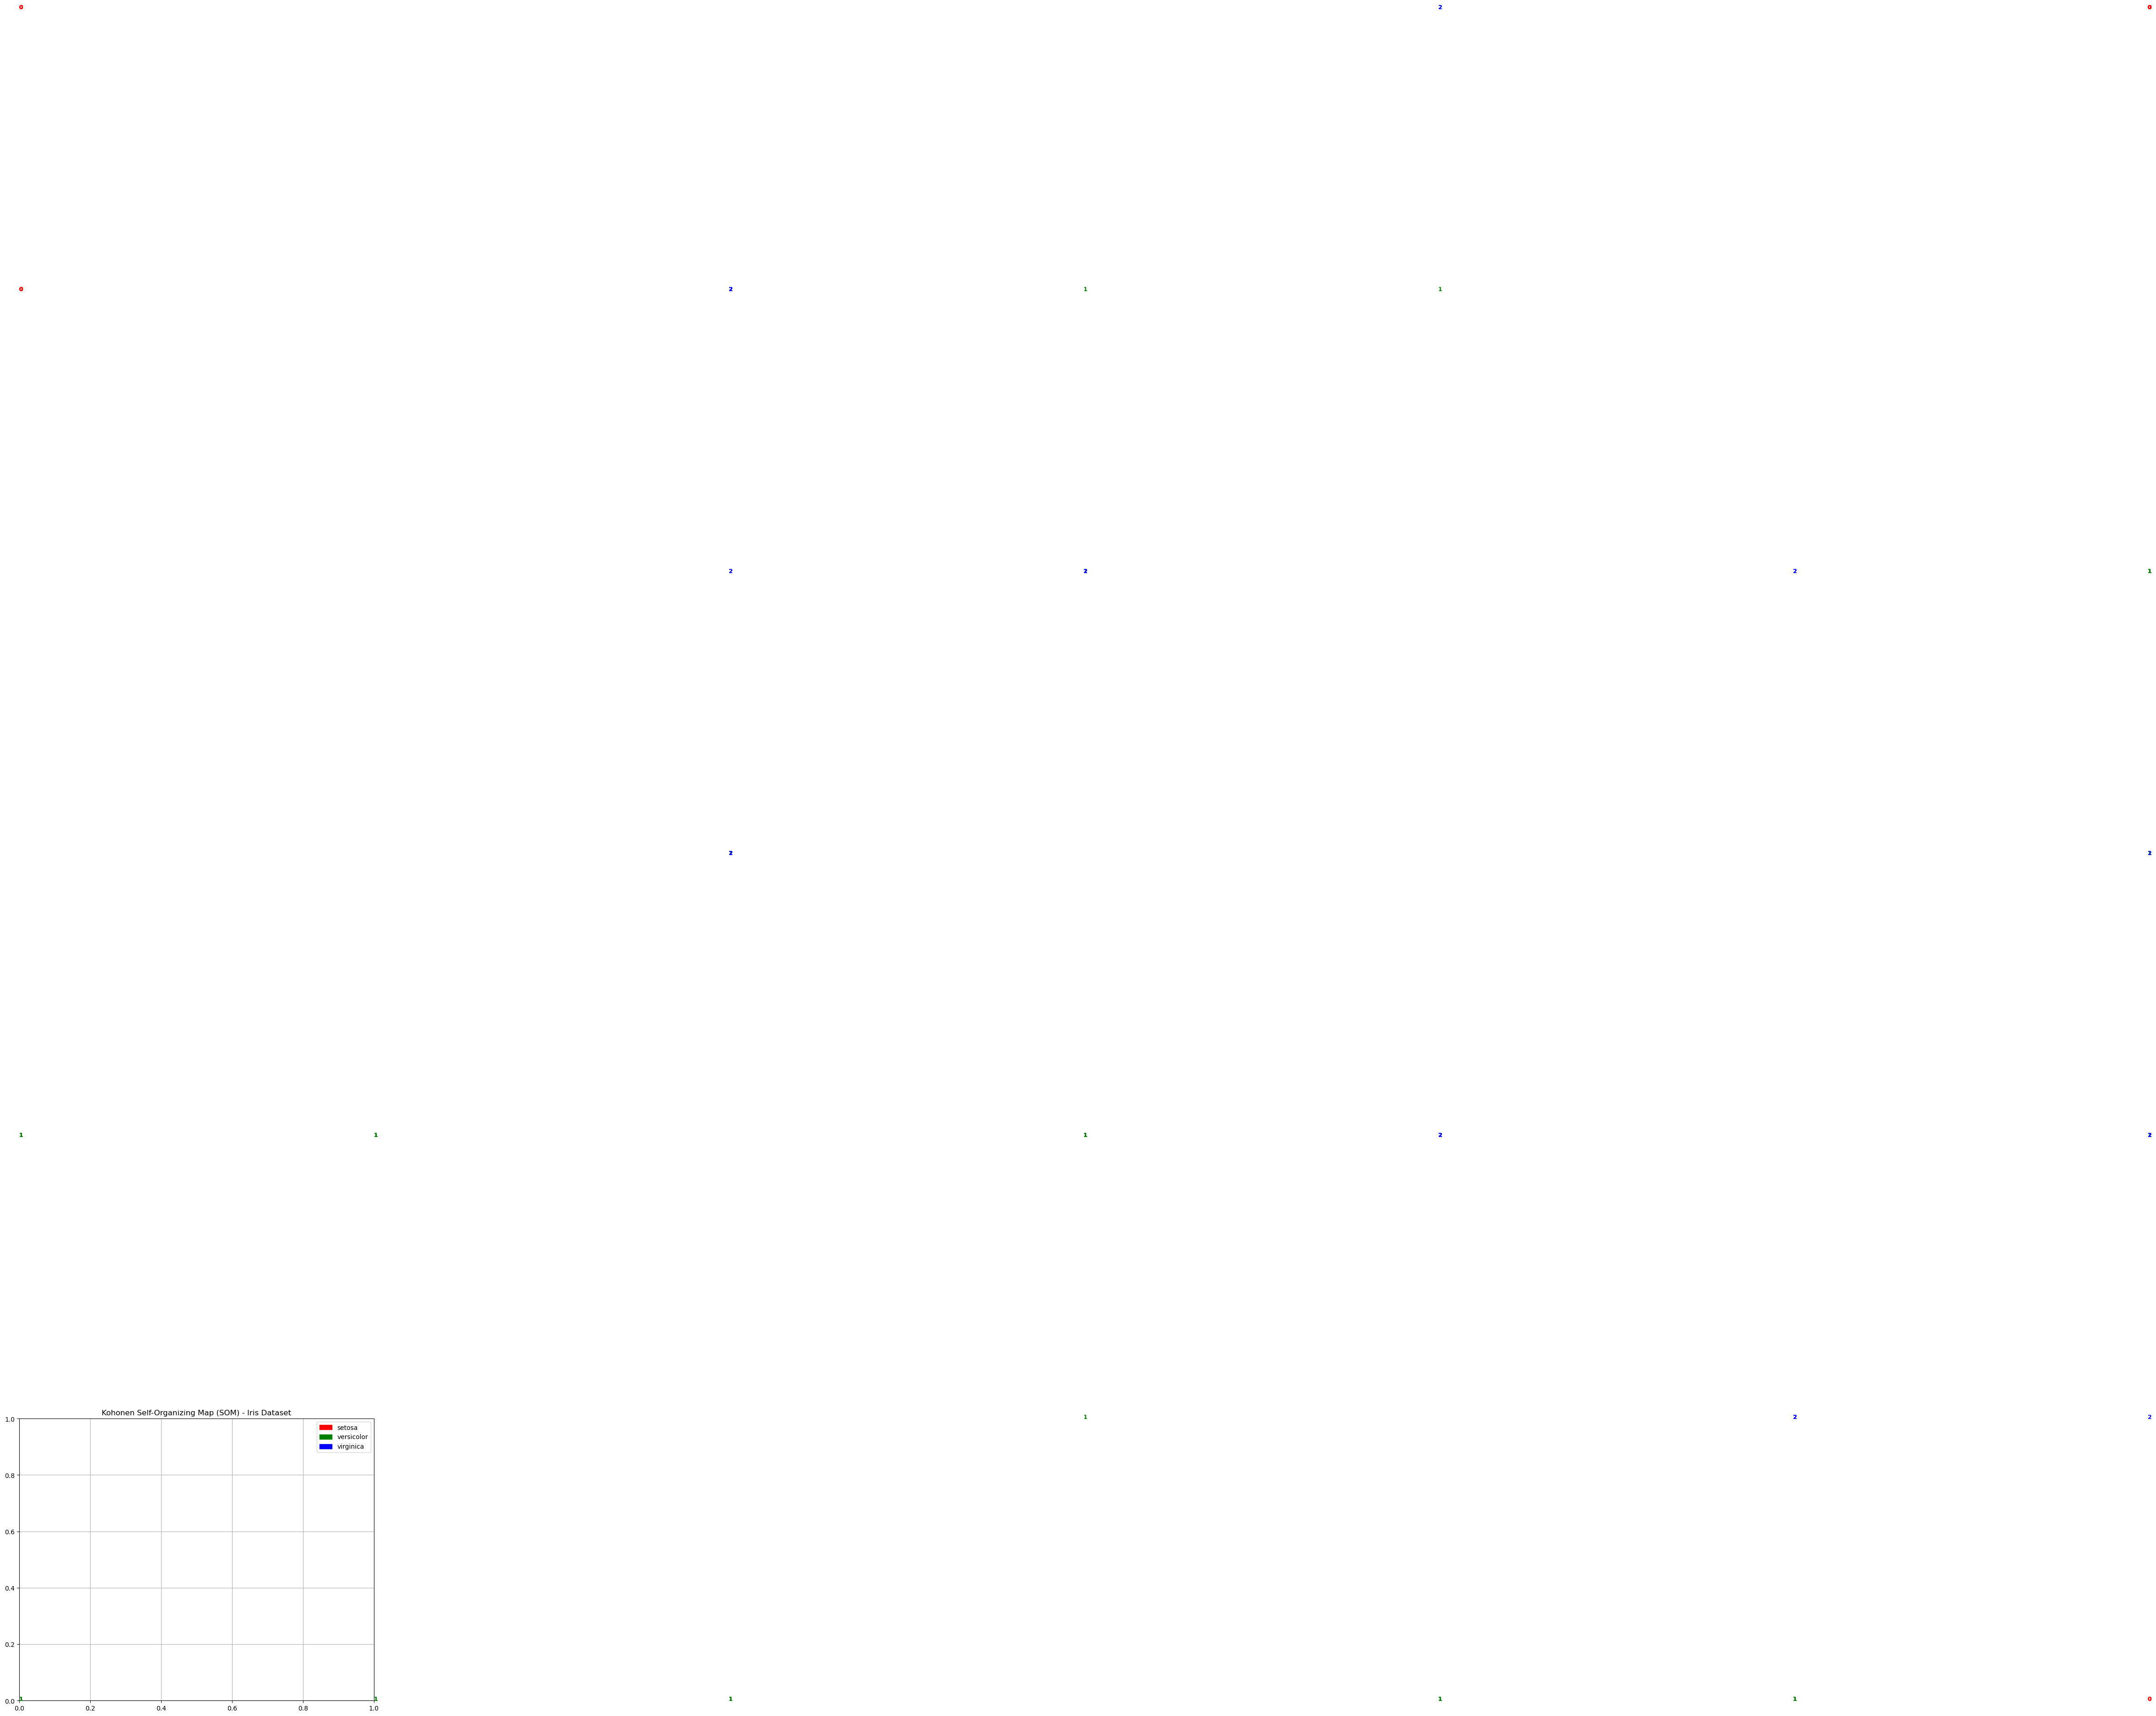

In [3]:
# Install MiniSom first (only once)
# pip install minisom

from minisom import MiniSom
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# 1. Load and normalize the dataset
iris = load_iris()
X = iris.data  # features (sepal & petal measurements)
y = iris.target  # labels (0 = setosa, 1 = versicolor, 2 = virginica)
labels = iris.target_names

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 2. Initialize SOM
som_grid_rows = 7
som_grid_cols = 7
input_len = X.shape[1]

som = MiniSom(x=som_grid_rows, y=som_grid_cols, input_len=input_len, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_scaled)

# 3. Train the SOM
som.train_random(X_scaled, num_iteration=100)

# 4. Visualize the result
colors = ['r', 'g', 'b']
label_names = ['setosa', 'versicolor', 'virginica']
color_map = [colors[label] for label in y]

plt.figure(figsize=(10, 8))
for i, x in enumerate(X_scaled):
    w = som.winner(x)
    plt.text(w[0], w[1], str(y[i]), color=color_map[i], fontdict={'weight': 'bold', 'size': 9})

legend_elements = [Patch(color=c, label=label_names[i]) for i, c in enumerate(colors)]
plt.title("Kohonen Self-Organizing Map (SOM) - Iris Dataset")
plt.legend(handles=legend_elements)
plt.grid()
plt.show()


Line / Step	            Explanation

MiniSom(...)	Initializes the SOM with a 7×7 grid and 4 input features.
 
random_weights_init	  Initializes weights with random values.
                 
train_random(...)	Trains SOM with 100 iterations on the normalized dataset.

winner(x)	       Finds the Best Matching Unit (BMU) for each input sample.

plt.text(...)	  Places each sample's label on the SOM grid.

Patch(...)	      Adds a legend for different Iris species.

Output:
The SOM grid (7x7) will display each data point with its class label (0, 1, or 2).

Neurons that are close together will represent similar data samples.

Ideal for visual clustering and interpretation.

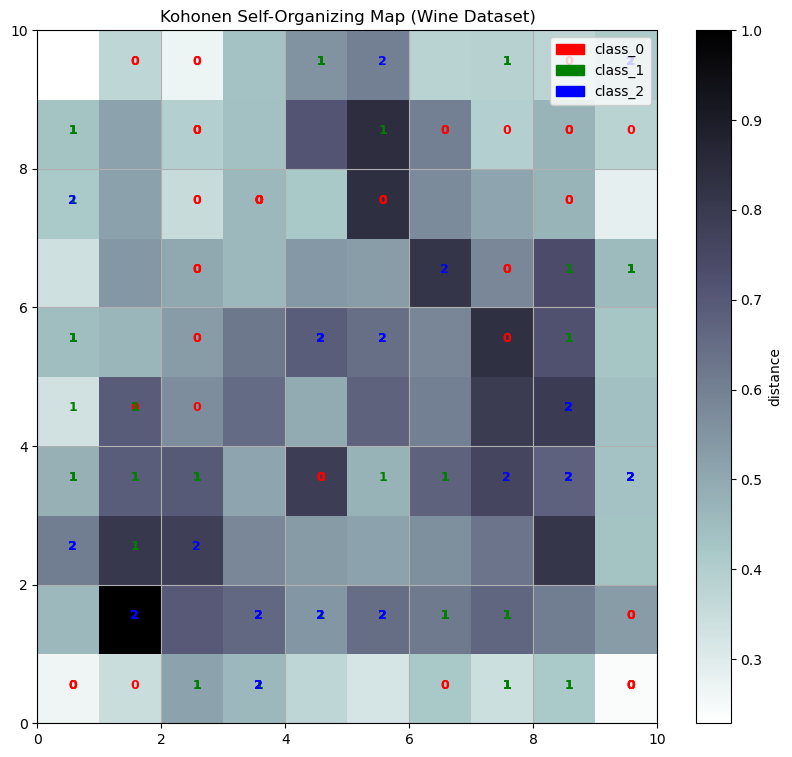

In [4]:
# Step 1: Install MiniSom
!pip install minisom

# Step 2: Import libraries
from minisom import MiniSom
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Step 3: Load and normalize dataset
wine = load_wine()
X = wine.data
y = wine.target
label_names = wine.target_names

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Create and train SOM
som = MiniSom(x=10, y=10, input_len=13, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_scaled)
som.train_random(X_scaled, 200)  # More training

# Step 5: Plot U-Matrix (distance map)
plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # U-matrix
plt.colorbar(label='distance')

# Step 6: Plot class labels on SOM
colors = ['r', 'g', 'b']
label_color = [colors[label] for label in y]

for i, x in enumerate(X_scaled):
    w = som.winner(x)
    plt.text(w[0] + 0.5, w[1] + 0.5, str(y[i]), color=label_color[i],
             fontdict={'weight': 'bold', 'size': 9})

legend = [Patch(color=c, label=label_names[i]) for i, c in enumerate(colors)]
plt.legend(handles=legend, loc='upper right')
plt.title("Kohonen Self-Organizing Map (Wine Dataset)")
plt.grid()
plt.show()


A U-Matrix background:

Light areas: similar clusters (same class)

Dark borders: transitions between classes

Wine class labels (0, 1, 2) clearly grouped in regions

 1. Background Color (U-Matrix)
This is a distance heatmap:

Each square (neuron) shows the average distance to its neighboring neurons.

Dark colors (black/dark gray) → High distance → Cluster boundary

Light colors (white/light blue) → Low distance → Similar neighbors

 Interpretation:
 
Light areas = neurons in a tight cluster (similar data).

Dark patches = transition zones or cluster boundaries.

2. Numbers on Grid Cells (Text Labels)

These numbers (colored red, green, blue) represent class labels of training samples mapped to that neuron.

Color	Class
🔴 Red	class_0
🟢 Green	class_1
🔵 Blue	class_2

The number is the class index.

If multiple data points from different classes map to the same neuron, multiple numbers are shown.

 Interpretation:
 
If a neuron has all same-colored labels, it is purely representing one class.

If a neuron has mixed colors, it means overlapping or confusing samples.

 3. Neuron Coordinates
 
The SOM here is a 10x10 grid → 100 neurons

Each cell (e.g., position (4,5)) is a neuron that stores a weight vector of 13 features (Wine dataset has 13 features).

During training, each sample is mapped to the Best Matching Unit (BMU).

 What You Can Conclude
 
Cluster Quality:

Neurons with mostly a single class → SOM is good at clustering.

Neurons with mixed labels → Some overlap between classes.

Class Separation:

class_0 (red) is mostly in the top right and upper half.

class_2 (blue) occupies many neurons in bottom-left and center.

class_1 (green) appears mostly scattered, but concentrated in lower center and bottom-right.

SOM Success:

Since classes are mostly grouped together, the SOM is doing a good job at representing clusters.

Dark patches show boundaries between different class clusters.